# 完整的模型训练流程———以CIFAR10数据集为例

In [11]:
#导入第三方库
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

In [2]:
#准备数据集
train_data = torchvision.datasets.CIFAR10(root='dataset_CIFAR10', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_data = torchvision.datasets.CIFAR10(root='dataset_CIFAR10', train=False, transform=torchvision.transforms.ToTensor(), download=True)

#打印数据集的长度
train_data_size = len(train_data)
test_data_size = len(test_data)
print("训练集的长度为：{}".format(train_data_size))
print("测试集的长度为：{}".format(test_data_size))

Files already downloaded and verified
Files already downloaded and verified
训练集的长度为：50000
测试集的长度为：10000


In [3]:
#使用DataLoader方法加载数据集
train_dataloader = DataLoader(train_data, batch_size= 64, shuffle= True)
test_dataloader = DataLoader(test_data, batch_size= 64, shuffle= True)

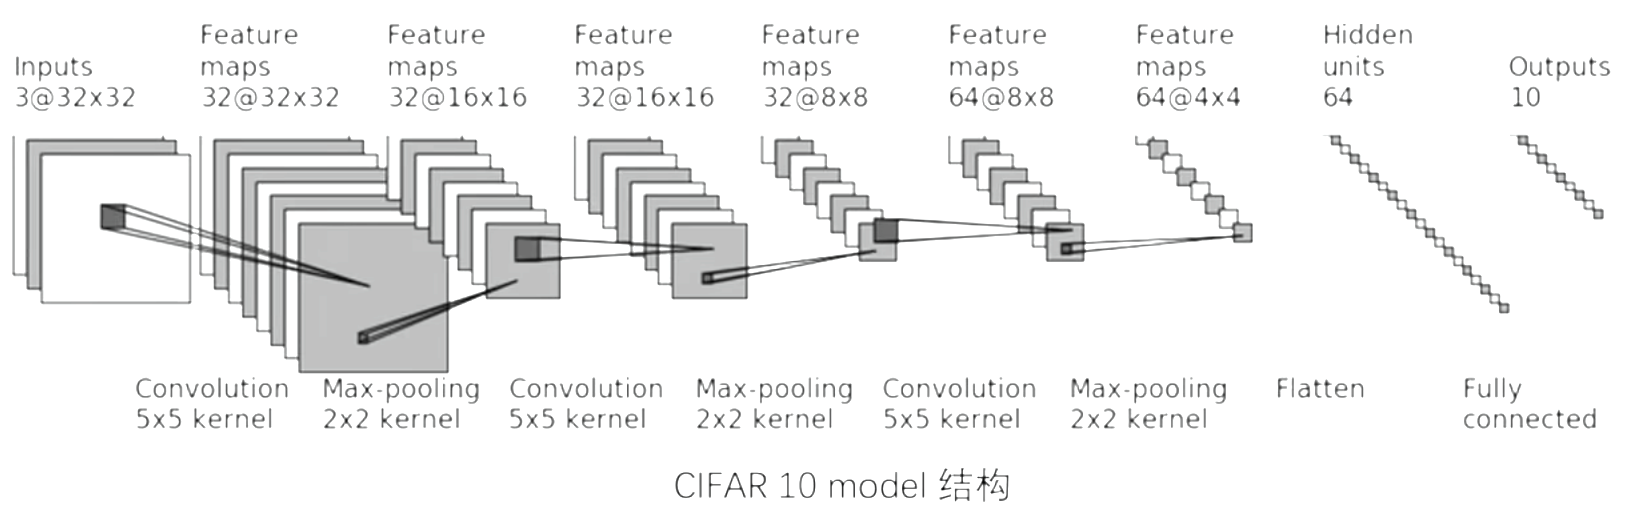

In [4]:
#搭建神经网络
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, 5, 1, 2),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 32, 5, 1, 2),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 5, 1, 2),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(64*4*4, 64),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [5]:
#测试神经网络模型
if __name__ == '__main__':
    model = Model()
    input = torch.ones((64, 3, 32, 32))
    output = model(input)
    print(output.shape)

torch.Size([64, 10])


In [6]:
#创建网络模型
model = Model()
#使用交叉熵损失函数创建模型的损失函数
loss_fn = nn.CrossEntropyLoss()
#定义优化器
learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [17]:
# 添加tensorboard
writer = SummaryWriter(log_dir= "logs_train_model")

#设置训练网络的一些参数
#记录训练的次数
total_train_step = 0
#记录测试的次数
total_test_step = 0
#设置训练的轮数
epochs = 10

for epoch in range(epochs):
    print("-------第{}轮训练开始-------".format(epoch+1))
    #训练步骤
    #在此处可以使用model.train()方法设置模型为训练状态，对模型中的Dropout以及BatchNorm有效
    for data in train_dataloader:
        imgs, targets = data
        outputs = model(imgs)
        loss = loss_fn(outputs, targets)
        #在进行反向传播优化模型参前，使用优化器将参数梯度清零
        optimizer.zero_grad()
        #反向传播
        loss.backward()
        total_train_step += 1
        if total_train_step % 100 == 0:
            # print("训练次数为：{}, Loss: {}".format(total_train_step, loss)),推荐使用loss.item()方法，将数据类型转变为浮点数
            print("训练次数：{}, 当前Loss: {}".format(total_train_step, loss.item()))
            writer.add_scalar("train_loss", loss.item(), total_train_step)

    #测试步骤
    #在此处可以使用model.eval()方法设置模型为验证状态，对模型中的Dropout以及BatchNorm有效
    total_test_loss = 0
    total_accuracy = 0
    with torch.no_grad():
        for data in test_dataloader:
            imgs, targets = data
            outputs = model(imgs)
            loss = loss_fn(outputs, targets)
            total_test_loss += loss.item()
            accuracy = (outputs.argmax(1)== targets).sum()
    print("整体测试集上的Loss: {}".format(total_test_loss))
    print("整体测试集上的Accuracy: {}".format(accuracy/test_data_size))
    writer.add_scalar("test_accuracy",accuracy/test_data_size, total_test_step)
    writer.add_scalar("test_loss", total_test_loss, total_test_step)
    total_test_step += 1
    #保存模型
    torch.save(model, "model_{}.pth".format(epoch+1))
    #官方推荐的保存方式
    # torch.save(model.state_dict(), "model_{}.pth".format(epoch+1))
    print("模型已保存")

writer.close()

-------第1轮训练开始-------
训练次数：100, 当前Loss: 2.3006656169891357
训练次数：200, 当前Loss: 2.327632427215576
训练次数：300, 当前Loss: 2.3220887184143066
训练次数：400, 当前Loss: 2.2964577674865723
训练次数：500, 当前Loss: 2.3084909915924072
训练次数：600, 当前Loss: 2.3160736560821533
训练次数：700, 当前Loss: 2.2947707176208496
整体测试集上的Loss: 362.29336285591125
整体测试集上的Accuracy: 9.999999747378752e-05
模型已保存
-------第2轮训练开始-------
训练次数：800, 当前Loss: 2.3048861026763916
训练次数：900, 当前Loss: 2.3235416412353516
训练次数：1000, 当前Loss: 2.3102879524230957
训练次数：1100, 当前Loss: 2.2851483821868896
训练次数：1200, 当前Loss: 2.3140249252319336
训练次数：1300, 当前Loss: 2.3079802989959717
训练次数：1400, 当前Loss: 2.3231289386749268
训练次数：1500, 当前Loss: 2.318908214569092
整体测试集上的Loss: 362.33585476875305
整体测试集上的Accuracy: 0.00019999999494757503
模型已保存
-------第3轮训练开始-------
训练次数：1600, 当前Loss: 2.302114725112915
训练次数：1700, 当前Loss: 2.278262138366699
训练次数：1800, 当前Loss: 2.3048272132873535
训练次数：1900, 当前Loss: 2.324148654937744
训练次数：2000, 当前Loss: 2.2911930084228516
训练次数：2100, 当前Loss: 2.297583103179

In [16]:
#计算模型正确率的示例代码,使用argmax方法
test_outputs = torch.tensor([[0.1, 0.2], 
                            [0.05, 0.4]])
print(test_outputs.argmax(1))
preds = test_outputs.argmax(1)
targets = torch.tensor([0, 1])
print((preds == targets).sum())


tensor([1, 1])
tensor(1)
